In [4]:
import os
import math
import random

import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

import torch.utils.data
import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
from torchvision import utils

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [81]:
reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [5]:
from IPython.display import clear_output
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
batch_size = 32

dataloader = torch.utils.data.DataLoader(
    datasets.MNIST('./data/mnist', train=True, download=True,
                   transform=transforms.Compose([
                       transforms.ToTensor(),
                       transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
                   ])),
    batch_size=batch_size, 
    shuffle=True)

In [48]:
class Generator(nn.Module):
    def __init__(self, z_size):
        super(Generator, self).__init__()
        
        self.linear_1 = nn.Linear(z_size, 128)
        
        self.linear_2 = nn.Linear(128, 256)
        self.batch_2 = nn.BatchNorm1d(256)
        
        self.linear_3 = nn.Linear(256, 512)
        self.batch_3 = nn.BatchNorm1d(512)
        
        self.linear_4 = nn.Linear(512, 784)
        self.batch_4 = nn.BatchNorm1d(784)
   
        self.linear_last = nn.Linear(784, 1 * 28 * 28)

    def forward(self, z):
        '''
        Inputs:
            noise: (batch x latent_size)
        Ouputs:
            image: (batch x 1 x 28 x 28)
        '''
        z = self.linear_1(z)
        z = F.leaky_relu(z, 0.2)
        
        z = self.linear_2(z)
        z = self.batch_2(z)
        z = F.leaky_relu(z, 0.2)
        
        z = self.linear_3(z)
        z = self.batch_3(z)
        z = F.leaky_relu(z, 0.2)
        
        z = self.linear_4(z)
        z = self.batch_4(z)
        z = F.leaky_relu(z, 0.2)
        
        
        image = self.linear_last(z)
        image = torch.tanh(image)
        image = image.view(-1, 1, 28, 28)

        
        return image

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        
        self.linear_1 = nn.Linear(1 * 28 * 28, 512)
        
        self.linear_2 = nn.Linear(512, 256)
        self.batch_2 = nn.BatchNorm1d(256)
    
        self.linear_3 = nn.Linear(256, 128)
        self.batch_3 = nn.BatchNorm1d(128)     
        
        self.linear_4 = nn.Linear(128, 64)
        self.batch_4 = nn.BatchNorm1d(64)     
        
        self.linear_last = nn.Linear(128, 1)
        

    def forward(self, image):
        '''
        Inputs:
            image: (batch x 1 x 64 x 64)
        Ouputs:
            prob:  (batch x 1)
        '''
        z = image.view(-1, 1 * 28 * 28)
        
        z = self.linear_1(z)
        z = F.leaky_relu(z, 0.2)
            
        z = self.linear_2(z)      
        z = self.batch_2(z)
        z = F.leaky_relu(z, 0.2)
        
        z = self.linear_3(z)      
        z = self.batch_3(z)
        z = F.leaky_relu(z, 0.2)
        
#         z = self.linear_4(z)      
#         z = self.batch_4(z)
#         z = F.leaky_relu(z, 0.2)

        z = self.linear_last(z)
        z = torch.sigmoid(z)

        return z

In [49]:
latent_size = 100

generator     = Generator(latent_size).to(device)
discriminator = Discriminator().to(device)

adversarial_loss = nn.BCELoss()

lr    = 0.0001
beta1 = 0.1
beta2 = 0.999

gen_optimizer = optim.Adam(generator.parameters(),     lr=lr, betas=(beta1, beta2))
dis_optimizer = optim.Adam(discriminator.parameters(), lr=lr, betas=(beta1, beta2))


epoch      = 0
num_epochs = 200

dis_losses = []
gen_losses = []


In [50]:
def show(img):
    npimg = img.numpy()
    #npimg = (npimg * 255).astype(np.uint8)
    plt.imshow(np.transpose(npimg, (1,2,0)), interpolation='nearest')
    

def show_image(generated_image):
    image = generated_image.cpu().detach()

    im_size = image.size(2)

    grid = utils.make_grid(image)
    plt.imshow(grid.numpy().transpose((1, 2, 0)))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


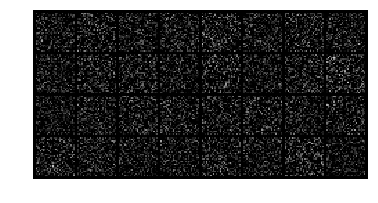

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


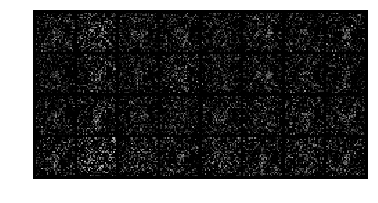

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


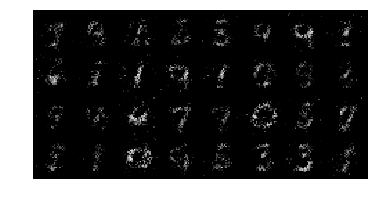

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


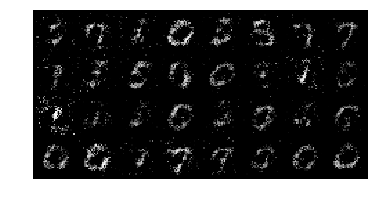

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


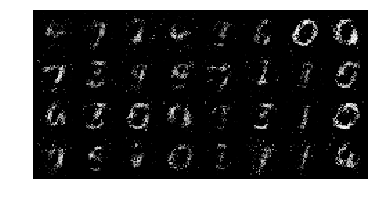

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


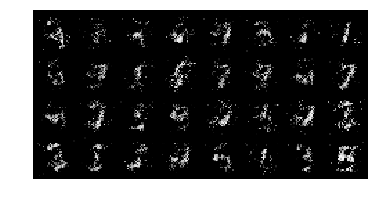

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


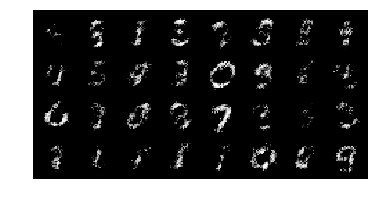

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


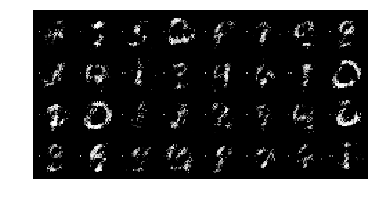

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


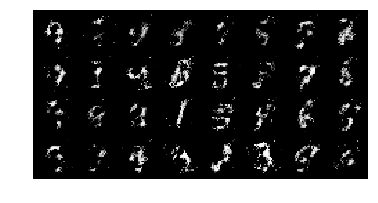

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


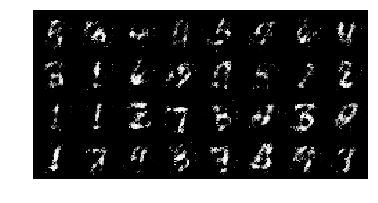

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


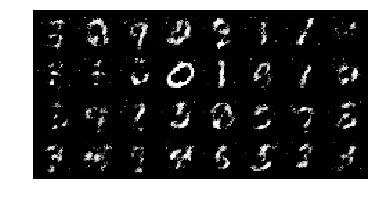

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


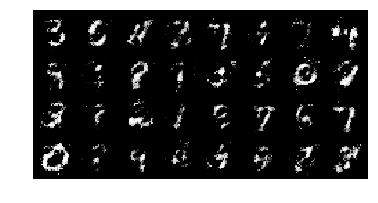

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


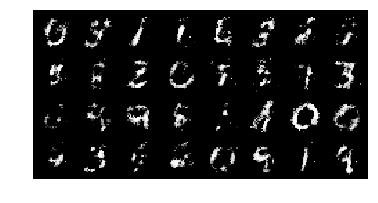

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


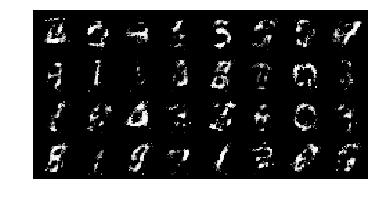

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


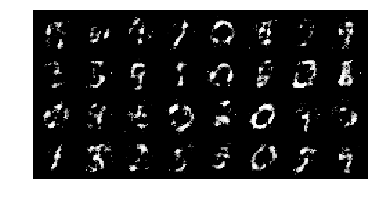

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


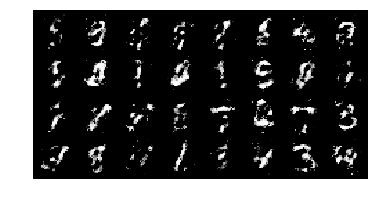

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


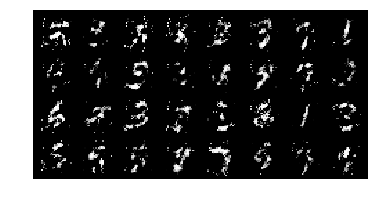

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


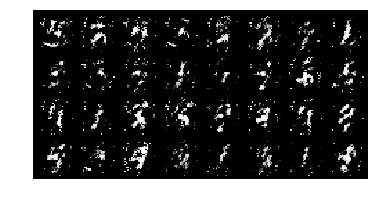

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


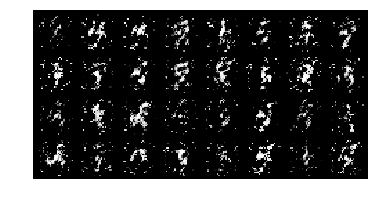

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


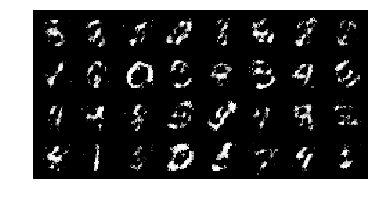

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


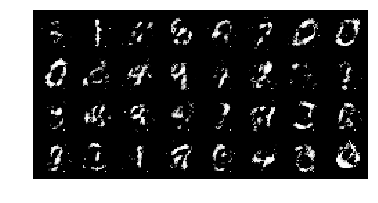

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


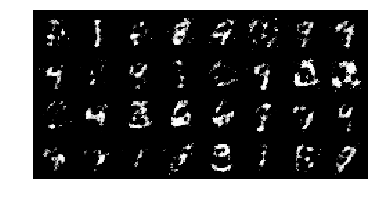

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


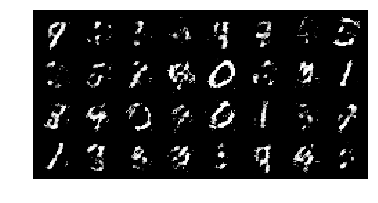

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


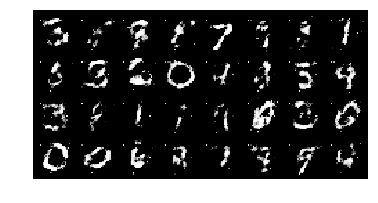

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


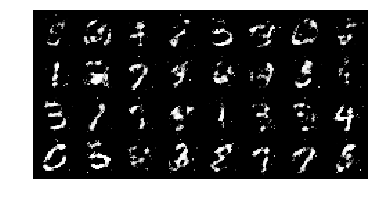

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


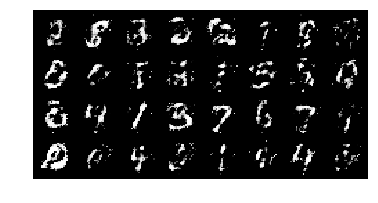

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


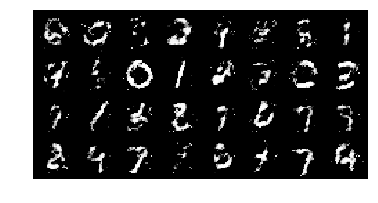

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


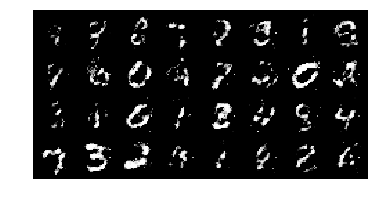

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


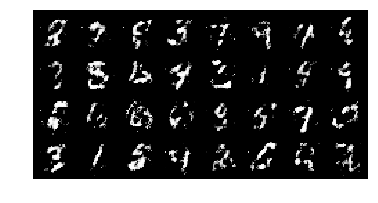

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


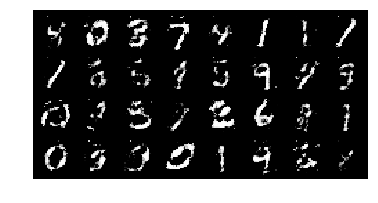

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


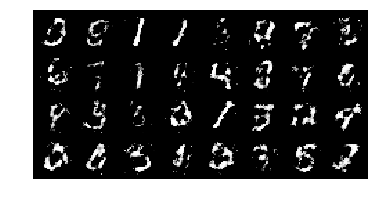

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


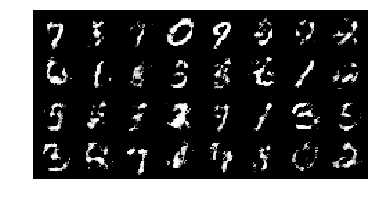

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


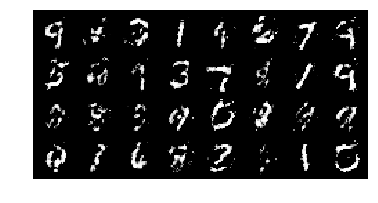

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


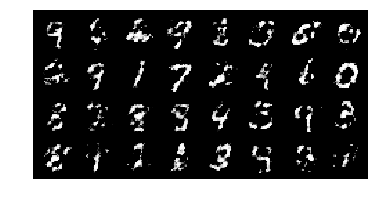

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


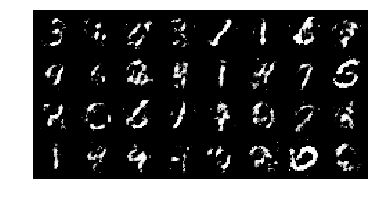

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


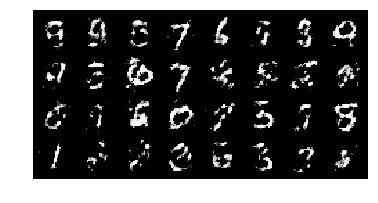

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


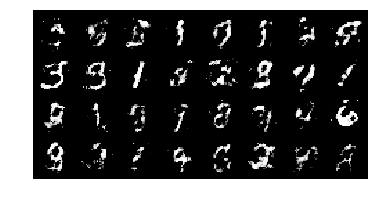

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


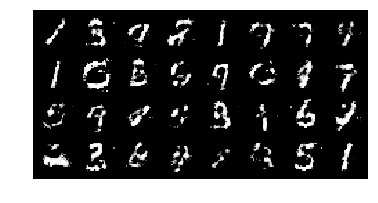

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


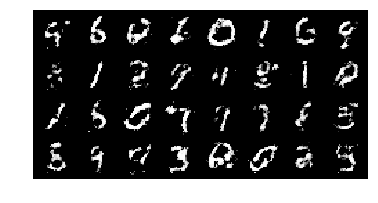

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


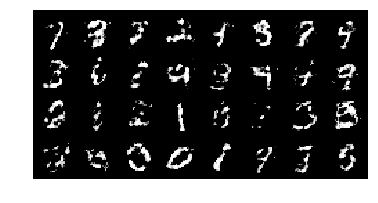

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


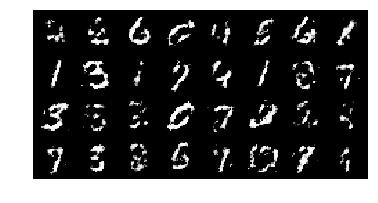

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


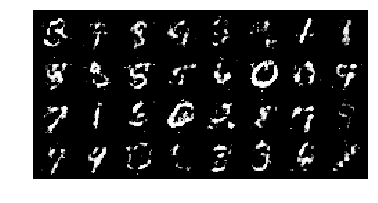

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


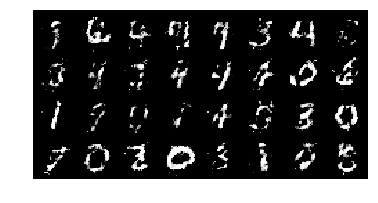

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


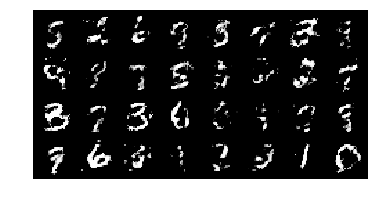

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


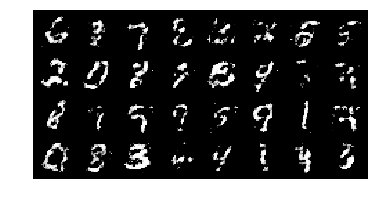

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


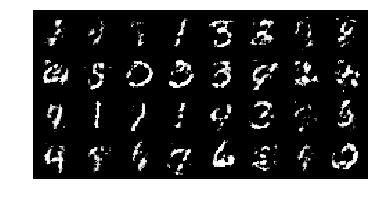

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


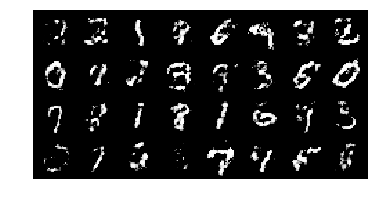

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


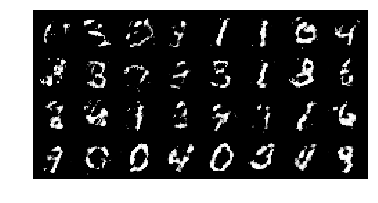

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


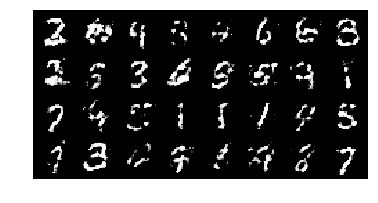

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


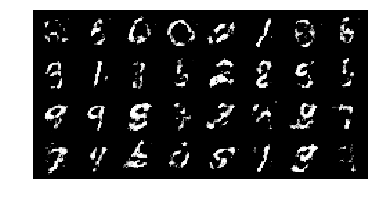

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


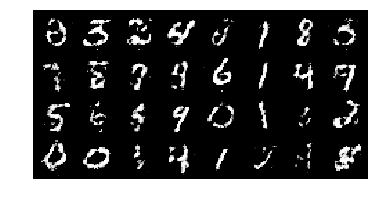

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


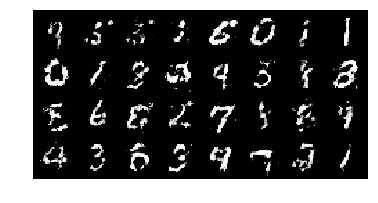

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


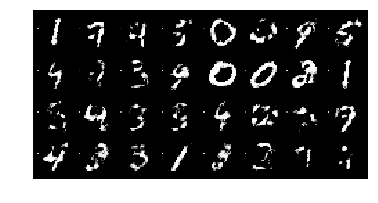

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


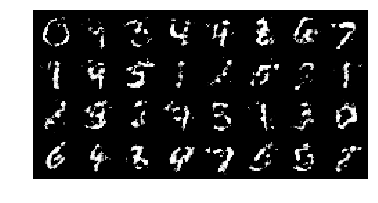

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


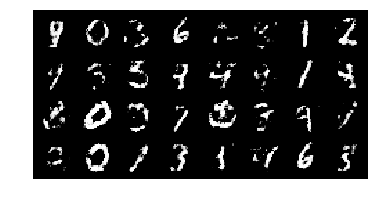

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


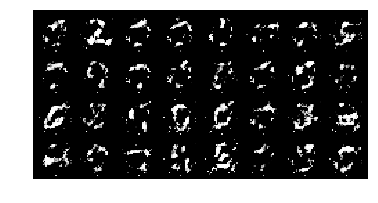

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


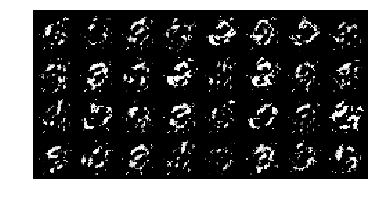

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


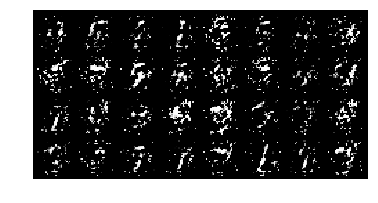

KeyboardInterrupt: 

In [51]:
while epoch < num_epochs:
    epoch += 1
    
    for batch_idx, (image, _) in enumerate(dataloader):
        image = image.to(device)
        
        real_labels = torch.ones(batch_size, 1).to(device)
        fake_labels = torch.zeros(batch_size, 1).to(device)

        ################
        #Train Generator
        ################
        
        generated_image = generator(torch.randn(batch_size, 100).to(device))
        
        generator_loss = adversarial_loss(discriminator(generated_image), real_labels)
        
        gen_optimizer.zero_grad()
        generator_loss.backward()
        gen_optimizer.step()
        

        #code here
        disc_output = discriminator(image)
        discriminator_loss = adversarial_loss(disc_output, real_labels) + adversarial_loss(discriminator(generated_image.detach()), fake_labels)
            
        dis_optimizer.zero_grad()
        discriminator_loss.backward()
        dis_optimizer.step()
        
        
        dis_losses.append(discriminator_loss.item()) 
        gen_losses.append(generator_loss.item())
        
        if batch_idx % 500 == 0:
            plt.figure()
            show_image(generated_image)
            plt.axis('off')
            plt.ioff()
            plt.show()